#📌 Extracão

In [70]:
import pandas as pd
import requests

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [71]:
print("Formato do dataset:", df.shape)
print("\nPrimeiras 5 linhas:")

print("\nTipos de dados por coluna:")
print(df.dtypes)

print("\nValores nulos por coluna:")
print(df.isnull().sum())

print("\nLista de colunas disponíveis:")
print(df.columns.tolist())

Formato do dataset: (7267, 6)

Primeiras 5 linhas:

Tipos de dados por coluna:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Valores nulos por coluna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

Lista de colunas disponíveis:
['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']


In [72]:
print(type(df.loc[0, 'customer'])) #tipos de dado da primeira linha de customer

#converter essas colunas complexas em string. Não estava conseguindo trabalhar com customer
df['customer'] = df['customer'].apply(lambda x: str(x))
df['phone'] = df['phone'].apply(lambda x: str(x))
df['internet'] = df['internet'].apply(lambda x: str(x))
df['account'] = df['account'].apply(lambda x: str(x))


print(f'\nNúmero de linhas duplicadas: {df.duplicated().sum()}')

<class 'dict'>

Número de linhas duplicadas: 0


In [73]:
print('Valores ausentes por cada coluna')
print(df.isnull().sum())

print(f'\nNúmero de linhas que estão duplicadas: {df.duplicated().sum()}')

for col in ['Churn', 'customer', 'phone', 'internet', 'account']:
  print(f"\nValores únicos em '{col}': {df[col].unique()}")

print('\nTipos de dados:')
print(df.dtypes)

Valores ausentes por cada coluna
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

Número de linhas que estão duplicadas: 0

Valores únicos em 'Churn': ['No' 'Yes' '']

Valores únicos em 'customer': ["{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'Yes', 'tenure': 9}"
 "{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 9}"
 "{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 4}"
 "{'gender': 'Male', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 13}"
 "{'gender': 'Female', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 3}"
 "{'gender': 'Female', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'Yes', 'tenure': 9}"
 "{'gender': 'Female', 'SeniorCitizen': 1, 'Partner': 'Yes', 'Dependents': 'No', 'tenure': 71}"
 "{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'Yes', 'Dependents': 'No', 't

In [74]:
import numpy as np

df['Churn']=df['Churn'].replace('',np.nan) # substituir strings vazias
df = df.dropna(subset=['Churn']) #Tirar as que estão sem valor

#listar todas as colunas para nromalizar
cols_texto = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
              'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
              'TechSupport', 'StreamingTV', 'StreamingMovies', 'account']

#padronização de formatação, tipos, tirar espaçoes e etc
for col in cols_texto:
  if col in df.columns:
    df.loc[:, col] = df[col].astype(str).str.strip().str.lower()

# correção de colunas numéricas pelo tipo de dados
if 'SeniorCitizien' in df.columns:
  df['SeniorCitizen'] = pd.to_numeric(df['SeniorCitizen'], erros='coerce')

if 'tenure' in df.columns:
  df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

print('Valores que estão ausente depois da limpeza')
print(df.isnull().sum())

df = df.drop_duplicates()

#tamanho final do dataset
print(f"\nData está pronto para análise com {df.shape[0]} linhas e {df.shape[1]} colunas.")

Valores que estão ausente depois da limpeza
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

Data está pronto para análise com 7043 linhas e 6 colunas.


In [75]:
print(df.columns.tolist())
print(df.head())
print(df.columns)


['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']
   customerID Churn                                           customer  \
0  0002-ORFBO    no  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    no  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '.

In [76]:
import pandas as pd
import requests
import ast

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"
#como eu já tinha expandido e tirado o account, eu tive que puxar de novo e expandir o dicionários
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)

def expand_dict_column(df, col_name): #expandindo o dicionário
    df[col_name] = df[col_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    expanded = df[col_name].apply(pd.Series)
    expanded = expanded.add_prefix(f"{col_name}_")  #para não ter confunsão
    return df.drop(columns=[col_name]).join(expanded)

# Expandir cada coluna
for col in ['account', 'customer', 'phone', 'internet']:
    if col in df.columns:
        df = expand_dict_column(df, col)

print(df.columns) #aqui pegamos os meses. Estava usando só o float mas o númerico não estava correto, estão busquei uma forma de tratamento
df['account_Charges'] = df['account_Charges'].apply(lambda x: float(x['Monthly']) if isinstance(x, dict) else float(x))
df['Contas_Diarias'] = df['account_Charges'] / 30

print(df[['account_Charges','Contas_Diarias']].head())
print("\nColunas disponíveis:")
print(df.columns)




Index(['customerID', 'Churn', 'account_Contract', 'account_PaperlessBilling',
       'account_PaymentMethod', 'account_Charges', 'customer_gender',
       'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents',
       'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines',
       'internet_InternetService', 'internet_OnlineSecurity',
       'internet_OnlineBackup', 'internet_DeviceProtection',
       'internet_TechSupport', 'internet_StreamingTV',
       'internet_StreamingMovies'],
      dtype='object')
   account_Charges  Contas_Diarias
0             65.6        2.186667
1             59.9        1.996667
2             73.9        2.463333
3             98.0        3.266667
4             83.9        2.796667

Colunas disponíveis:
Index(['customerID', 'Churn', 'account_Contract', 'account_PaperlessBilling',
       'account_PaymentMethod', 'account_Charges', 'customer_gender',
       'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents',
       'custo

#📊 Carga e análise

In [77]:
#estatísticas gerais com base no link sugerido no challeng 2

df[['customer_tenure','account_Charges', 'Contas_Diarias']].describe()

#mostrando média, mediana, devio padrão, quartise máximo e mínimo

,customer_tenure,account_Charges,Contas_Diarias
count,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2.157337
std,24.571773,30.129572,1.004319
min,0.000000,18.250000,0.608333
25%,9.000000,35.425000,1.180833
50%,29.000000,70.300000,2.343333
75%,55.000000,89.875000,2.995833
max,72.000000,118.750000,3.958333


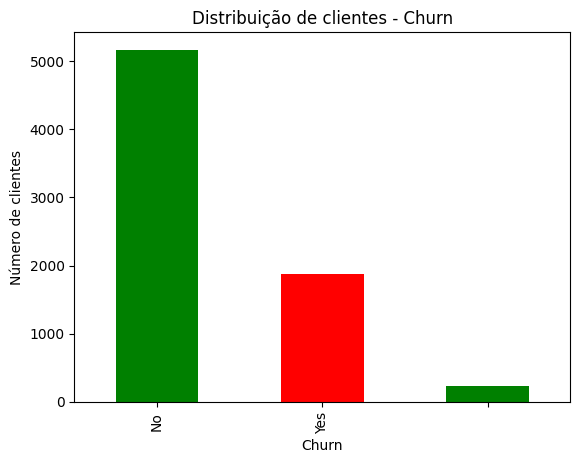

In [78]:
#Churn

import matplotlib.pyplot as plt

churn_counts = df['Churn'].value_counts() #contagem desses clientes que tiveram evasão ou não
churn_counts.plot(kind='bar', color=['green','red'], title='Distribuição de clientes - Churn')

plt.ylabel('Número de clientes')
plt.show()

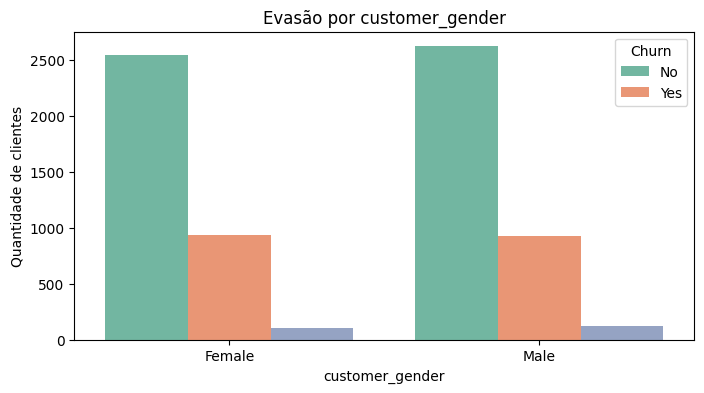

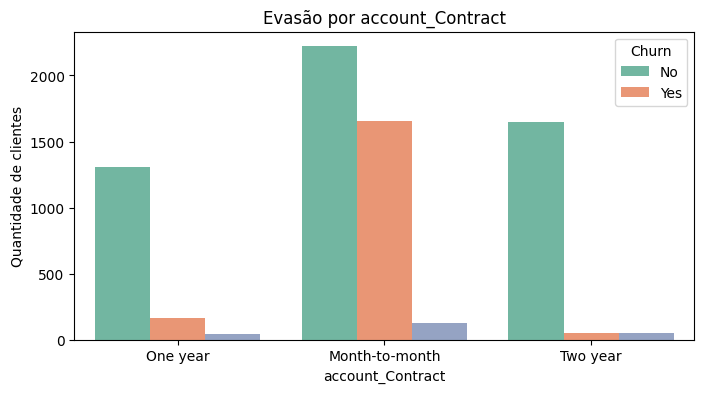

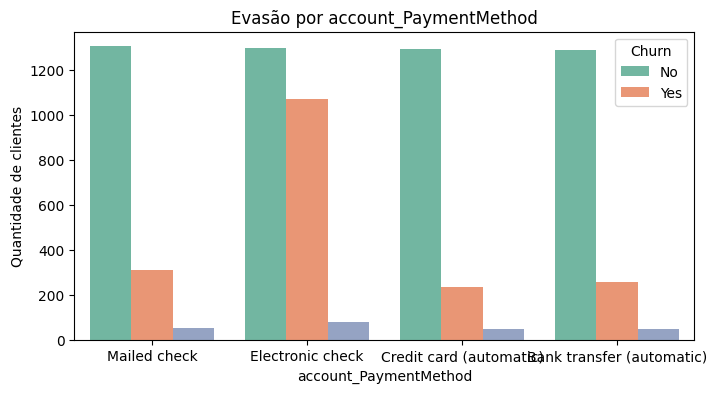

In [79]:
#evasão por categorias

import seaborn as sns

categorical_cols = ['customer_gender', 'account_Contract', 'account_PaymentMethod']

for col in categorical_cols:
  plt.figure(figsize=(8,4))
  sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
  plt.title(f'Evasão por {col}')
  plt.ylabel('Quantidade de clientes')
  plt.show()

/tmp/ipython-input-3907878951.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='Set3')


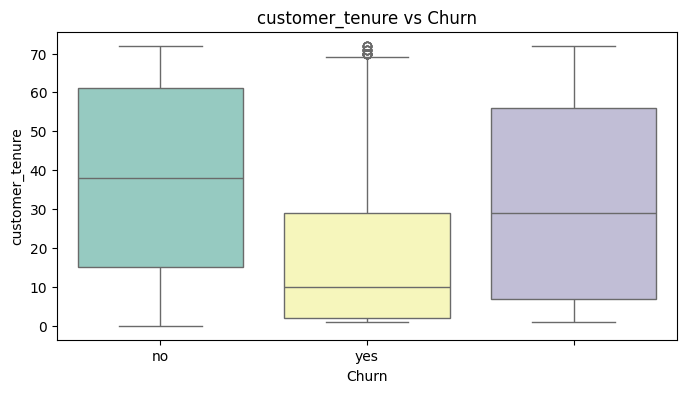

/tmp/ipython-input-3907878951.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='Set3')


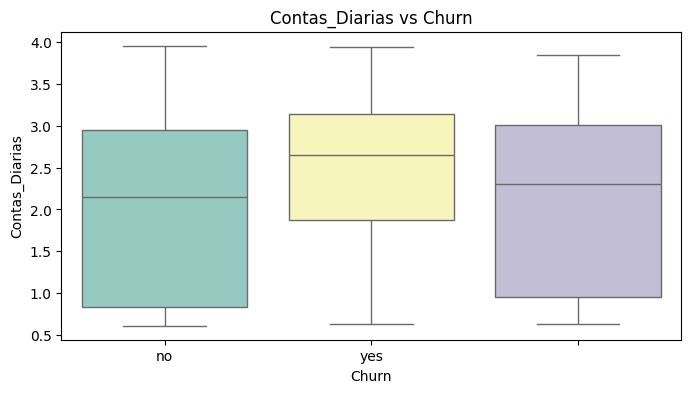

In [83]:
#Comparar as variáveis entre clientes que cancelaram e não cancelaram - exploranto formas de plot :)

#ter um filtro de yes e no + padronizar a coluna
df['Churn'] = df['Churn'].astype(str).str.strip().str.lower()
df_plot = df[df['Churn'].isin(['yes', 'no'])].copy()

#garantir as colunas numéricas
numeric_cols = ['customer_tenure', 'Contas_Diarias']
df_plot[numeric_cols] = df_plot[numeric_cols].apply(pd.to_numeric, errors='coerce')
df_plot = df_plot.dropna(subset=numeric_cols)

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x='Churn', y=col, palette='Set3')
    plt.title(f'{col} vs Churn')
    plt.show()


#📄Relatorio Final

Limpeza e tratamento


*   Importação a partir de API com formato de JSON
*   Conversão desses dados em DataFrame panda
*   Verificação e tratamento de varlores nulos, duplicados e formatação

*   Expansão das colunas com dicionários para colunas apartadas

*   Conversão de colunas numéricas para float
*   Padronização da coluna Churn contendo yes e no







/tmp/ipython-input-1655406566.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


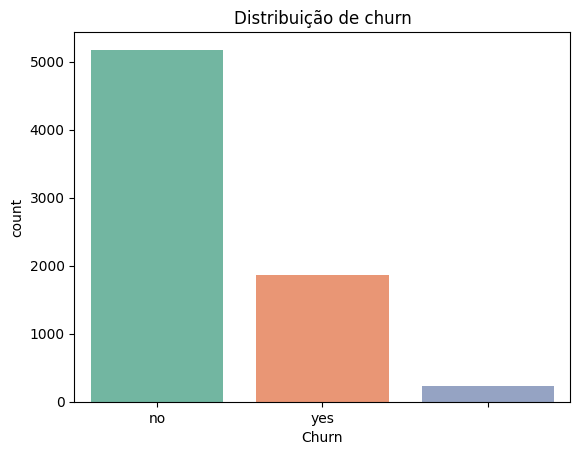

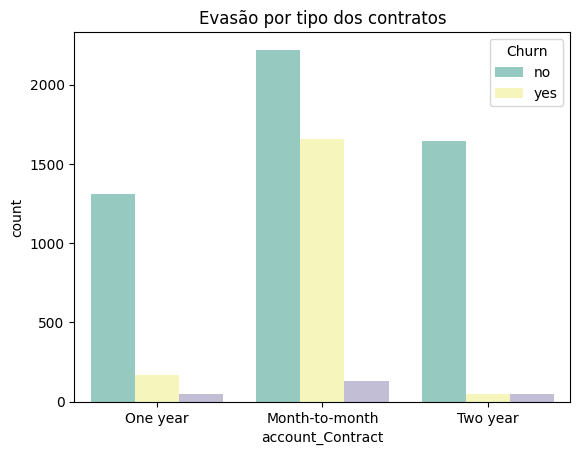

/tmp/ipython-input-1655406566.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='Set3')


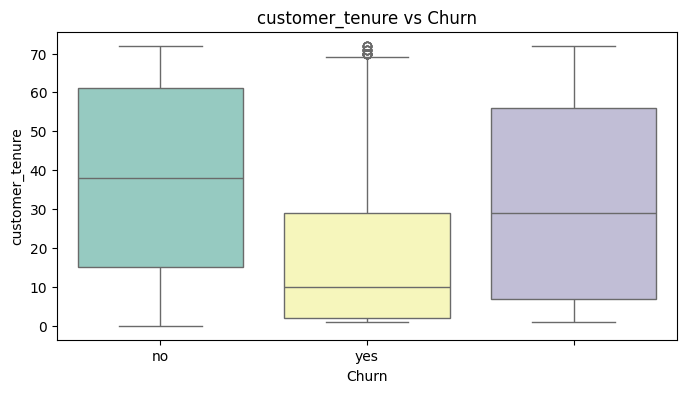

/tmp/ipython-input-1655406566.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=col, palette='Set3')


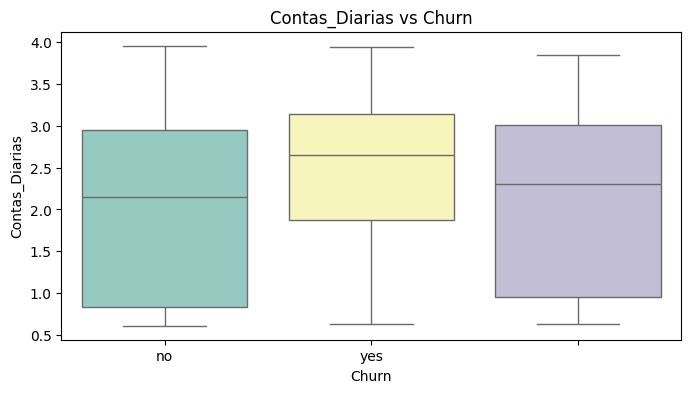

,customer_tenure,Contas_Diarias
count,7267.000000,7267.000000
mean,32.346498,2.157337
std,24.571773,1.004319
min,0.000000,0.608333
25%,9.000000,1.180833
50%,29.000000,2.343333
75%,55.000000,2.995833
max,72.000000,3.958333


In [88]:
#Análise exploratória dos Dados

#distribuição de churn
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Distribuição de churn')
plt.show()

#categóricas x Churn
sns.countplot(data=df, x='account_Contract', hue='Churn', palette='Set3')
plt.title('Evasão por tipo dos contratos')
plt.show()

#numéricas x Churn
numeric_cols = ['customer_tenure', 'Contas_Diarias']
df_plot[numeric_cols] = df_plot[numeric_cols].apply(pd.to_numeric, errors='coerce')
df_plot = df_plot.dropna(subset=numeric_cols)

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x='Churn', y=col, palette='Set3')
    plt.title(f'{col} vs Churn')
    plt.show()

#Estatísticas
df[numeric_cols].describe()

Conclusões


*   Cliente month-to-month tem uma maior tava de evasão
*   Clientes com menor tempo de contrato e menor gasto diários tem uma tendência de cancelar mais

*   Serviços adicionais podem influenciar nessa retenção dos clientes

Recomendações de negócio


*   Icentivar descontos ou serviços para contratos mais longos
*   Campanha de marketing para reter clientes recentes e/ou com pouco gasto por dia





